

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [71]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = twoDaysAgo
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-20'] ['2016-12-19'] ['2016-12-14']
['2016-12-19']
'2016-12-19'


### get url

In [72]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-19'


In [73]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [74]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [75]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [76]:
df = pd.read_csv(url)

In [77]:
df.shape

(373, 16)

#### wow, 5 days > 1000 reports

In [78]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6648310,12/21/2016 12:34:49 AM,NaN,12/21/2016 12:35:59 AM,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Offensive,"1298 MARKET ST, SAN FRANCISCO, CA, 94102",6,Civic Center,"(37.777994659774, -122.416172955369)",Voice In,NaN
1,6648309,12/21/2016 12:32:19 AM,NaN,12/21/2016 12:33:57 AM,Open,open,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of GROVE ST and LARKIN ST,6,Civic Center,"(37.7786578180815, -122.416580307266)",Voice In,NaN
2,6648308,12/21/2016 12:28:49 AM,NaN,12/21/2016 12:31:07 AM,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"1298 MARKET ST, SAN FRANCISCO, CA, 94102",6,Civic Center,"(37.777994659774, -122.416172955369)",Voice In,NaN


In [79]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [80]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6648310,2016-12-21 00:34:49,NaT,2016-12-21 00:35:59,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Offensive,"1298 MARKET ST, SAN FRANCISCO, CA, 94102",6,Civic Center,"(37.777994659774, -122.416172955369)",Voice In,NaN
1,6648309,2016-12-21 00:32:19,NaT,2016-12-21 00:33:57,Open,open,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of GROVE ST and LARKIN ST,6,Civic Center,"(37.7786578180815, -122.416580307266)",Voice In,NaN
2,6648308,2016-12-21 00:28:49,NaT,2016-12-21 00:31:07,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"1298 MARKET ST, SAN FRANCISCO, CA, 94102",6,Civic Center,"(37.777994659774, -122.416172955369)",Voice In,NaN


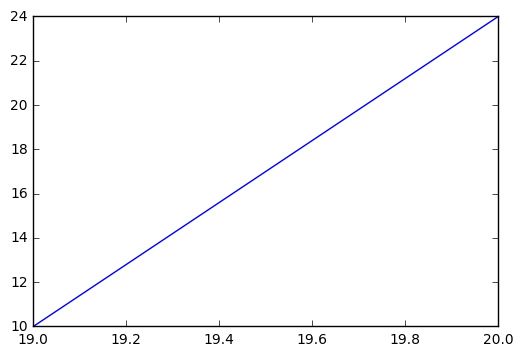

In [81]:
df.Closed.dt.day.value_counts().sort_index().plot()

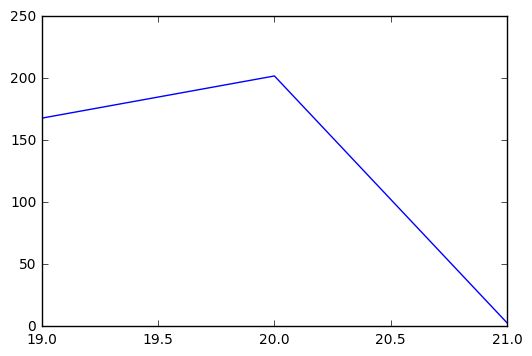

In [82]:
df.Opened.dt.day.value_counts().sort_index().plot()

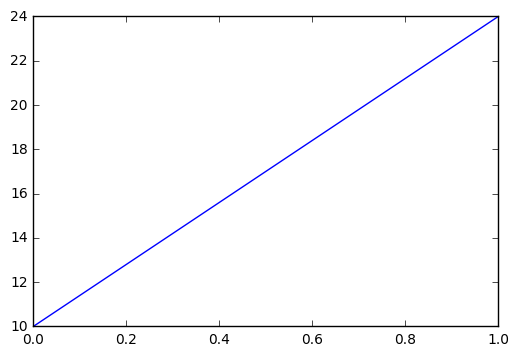

In [83]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [84]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [85]:

df['Request Details'].value_counts()


Building_commercial - Not_Offensive                 73
Other_enter_additional_details_below - Offensive    34
Mail_box - Not_Offensive                            33
Building_other - Not_Offensive                      31
Signal_box - Not_Offensive                          26
Sidewalk_in_front_of_property - Not_Offensive       24
Transit_Shelter_Platform - Not_Offensive            22
Building_residential - Not_Offensive                20
Pole - Not_Offensive                                15
Parking_meter - Not_Offensive                       13
Building_commercial - Offensive                     11
City_receptacle - Not_Offensive                     10
Sidewalk_structure - Not_Offensive                   9
Transit_Shelter_Platform - Offensive                 7
Sidewalk_structure - Offensive                       7
News_rack - Not_Offensive                            6
Fire_hydrant - Not_Offensive                         5
Signal_box - Offensive                               5
Sidewalk_i

In [86]:
df['Supervisor District'].value_counts().sort_index()



1       3
2       2
3      49
4       1
5      39
6      78
7       6
8      56
9     111
10     19
11      9
Name: Supervisor District, dtype: int64

In [87]:
df.Neighborhood.value_counts()

Mission                         108
South of Market                  51
Chinatown                        36
Mission Dolores                  27
Civic Center                     17
Duboce Triangle                  12
Tenderloin                       10
Lower Haight                      9
Excelsior                         6
Potrero Hill                      5
Downtown / Union Square           4
Nob Hill                          4
Hayes Valley                      4
Apparel City                      4
Lower Nob Hill                    4
Bayview                           3
Bernal Heights                    3
Mission Terrace                   3
Western Addition                  3
Panhandle                         2
Westwood Park                     2
South Beach                       2
Golden Gate Park                  2
Inner Sunset                      2
Japantown                         2
Ingleside                         2
Buena Vista                       2
Visitacion Valley           

In [88]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
5,6647986,2016-12-20 19:12:25,NaT,2016-12-20 19:12:25,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,"2647 MISSION ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.754637042676, -122.418488959055)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859f30f3da153f1b6e85440/report.jpg
6,6647981,2016-12-20 19:09:01,NaT,2016-12-20 19:10:23,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of 22ND ST and YORK ST,9,Mission,"(37.7560546420969, -122.408499131392)",Voice In,NaN
22,6647750,2016-12-20 17:23:57,NaT,2016-12-20 17:33:45,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"2806 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752343885428, -122.414264400063)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d9a13da153f1b6e85145/report.jpg
23,6647644,2016-12-20 16:53:02,NaT,2016-12-20 17:03:08,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,Intersection of 22ND ST and FOLSOM ST,9,Mission,"(37.7556995565731, -122.414387540457)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d2643da153f1b6e8506a/report.jpg
25,6647634,2016-12-20 16:51:29,NaT,2016-12-20 16:51:29,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Transit_Shelter_Platform - Offensive,"2412 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.758619579654, -122.414862442433)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d2033da153f1b6e85045/report.jpg
26,6647625,2016-12-20 16:50:08,NaT,2016-12-20 16:50:08,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Transit_Shelter_Platform - Offensive,Intersection of 18TH ST and FOLSOM ST,9,Mission,"(37.7620990219907, -122.414998461628)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d1b53da153f1b6e85020/report.jpg
27,6647618,2016-12-20 16:48:24,NaT,2016-12-20 16:48:24,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"1960 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765922105618, -122.415564642563)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d14c3da153f1b6e8500c/report.jpg
28,6647615,2016-12-20 16:47:30,NaT,2016-12-20 16:47:30,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Transit_Shelter_Platform - Offensive,Intersection of 14TH ST and FOLSOM ST,9,Mission,"(37.768537410802, -122.415613952496)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d1153da153f1b6e85000/report.jpg
29,6647612,2016-12-20 16:47:05,NaT,2016-12-20 16:47:05,Open,open,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"1771 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.768742279094, -122.415450843471)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5859d0fe3da153f1b6e84fe8/report.jpg
37,6647400,2016-12-20 15:59:26,NaT,2016-12-20 15:59:26,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_other - Not_Offensive,"3350 18TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.762021230401, -122.418478740988)",Integrated Agency,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [89]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [92]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])
peskin[:300].to_csv("./peskinlist.txt", index=False)


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859cb273da153f1b6e84efc/photo_20161220_162131.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859c9c13da153f1b6e84eca/photo_20161220_161548.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859c8d93da153f1b6e84e97/photo_20161220_161147.jpg
3                                                                                                                 NaN
4                                                                                                                 NaN
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585991ec3da153f1b6e84760/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/58598f1f3da153f1b6e846df/photo_20161220_120636.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/58597cd53da153f1b6e842dd/photo_20161220_104649.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [68]:
print(peskin[:])

0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859cb273da153f1b6e84efc/photo_20161220_162131.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859c9c13da153f1b6e84eca/photo_20161220_161548.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859c8d93da153f1b6e84e97/photo_20161220_161147.jpg
3                                                                                                                 NaN
4                                                                                                                 NaN
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585991ec3da153f1b6e84760/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/58598f1f3da153f1b6e846df/photo_20161220_120636.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/58597cd53da153f1b6e842dd/photo_20161220_104649.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

# The whole City

In [60]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859f30f3da153f1b6e85440/report.jpg
1                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859ef023da153f1b6e853dc/report.jpg
2                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859ee4c3da153f1b6e853b8/report.jpg
3                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859ee353da153f1b6e853ae/report.jpg
4                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859edea3da153f1b6e8539a/report.jpg
5                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859eb2a3da153f1b6e85356/report.jpg
6                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859eab43da153f1b6e8533e/report.jpg
7                     http://mobile311.sfgov.org/media/san_francisco/report/photos/5859e9f13da153f1b6e85334/report.jpg
8                     http://mobile311.sfgov.org

In [61]:
len(images)

267

In [62]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5859f30f3da153f1b6e85440/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5859ee4c3da153f1b6e853b8/report.jpg


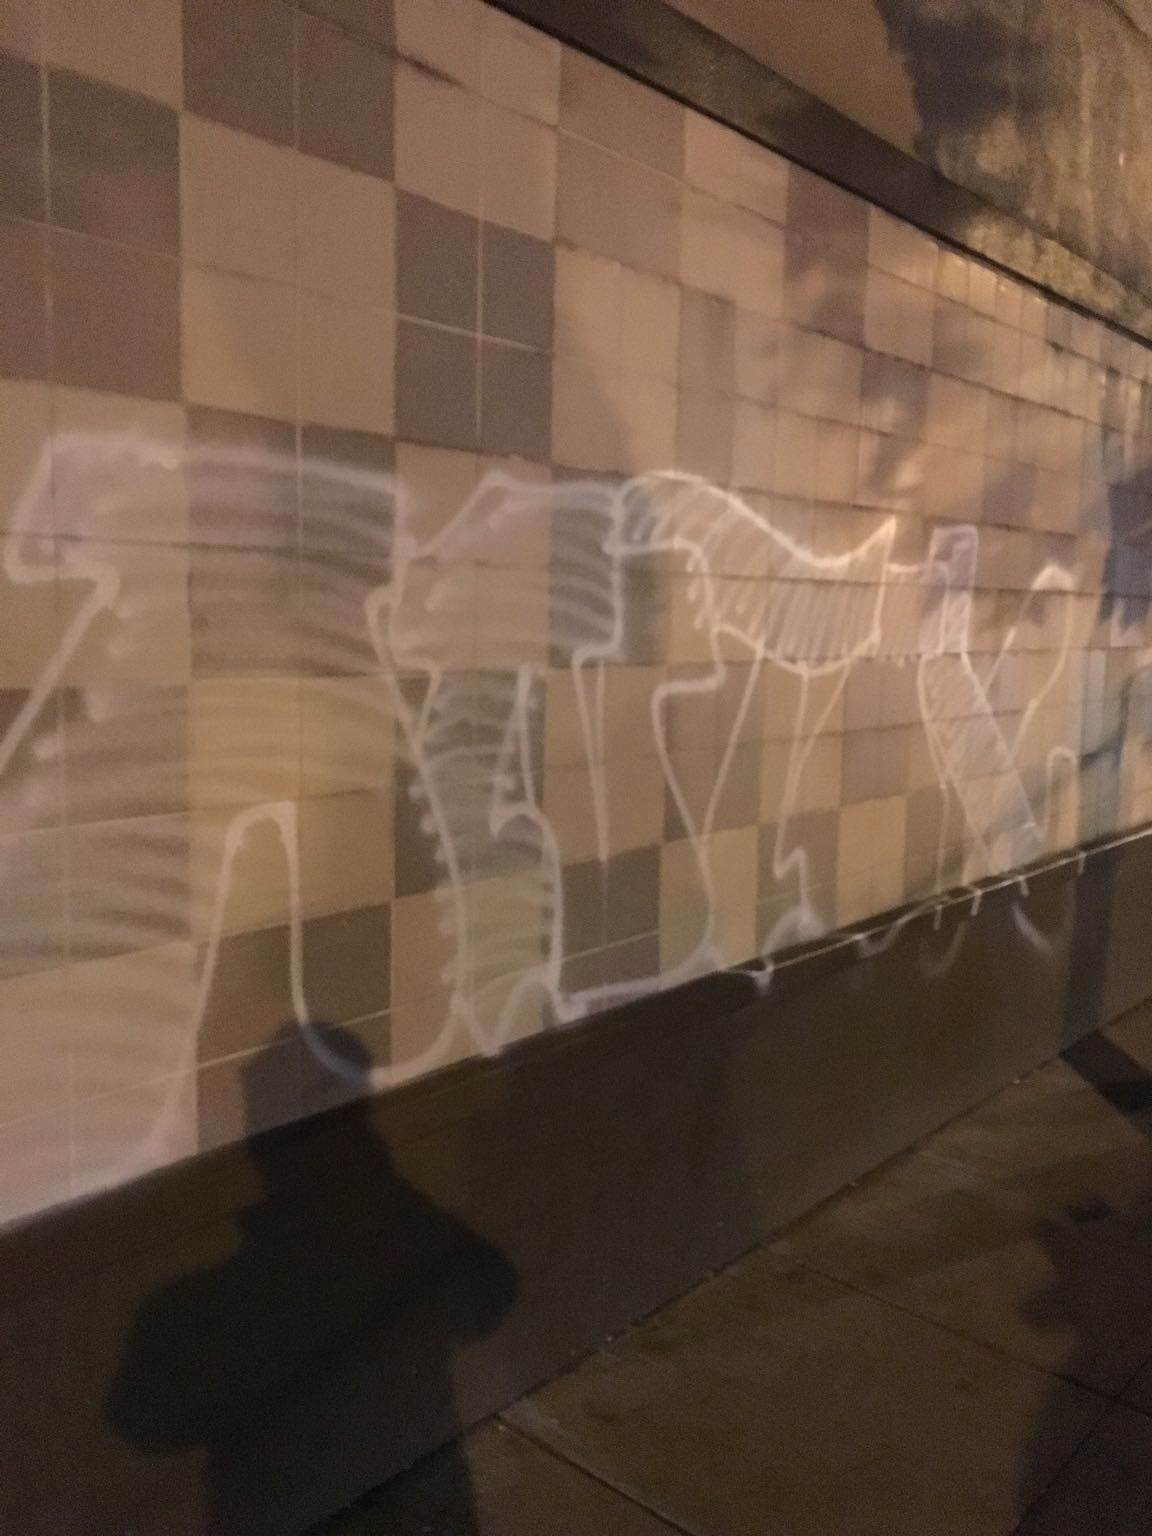

In [63]:
print(images[2])
Image(images[2])


In [64]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [67]:
images[:1000].to_csv("./imagelist.txt", index=False)


In [66]:
!yes| bash vidCreate.sh 

--2016-12-21 15:41:51--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5859f30f3da153f1b6e85440/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224600 (219K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 219.34K   945KB/s    in 0.2s    

2016-12-21 15:41:52 (945 KB/s) - 'report.jpg' saved [224600/224600]

--2016-12-21 15:41:52--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5859ef023da153f1b6e853dc/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 158199 (154K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>] 154.49K  --.-KB/s    in 0.04s   

2016-12-21 15:41:52 (3.87 MB/s) - 'report.jpg.1' saved [158199/158199]

--2016-12-21 15:41:52--

In [ ]:
!ls -la
